In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics as sk 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import sklearn.metrics

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.4f}'.format
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
#		np.set_printoptions(precision=3)
#		np.set_printoptions(suppress=True) 


In [4]:
filename = "c:/aa mtas/AA_ER/ml/python-code/bigmart-sales-data/Train.csv"
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

df_train= pd.read_csv(filename) 
df_train.head()

df_test = pd.read_csv("c:/aa mtas/AA_ER/ml/python-code/bigmart-sales-data/Test.csv")
df_test.head()               

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75000,Low Fat,0.00756,Snack Foods,107.86220,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30000,reg,0.03843,Dairy,87.31980,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60000,Low Fat,0.09957,Others,241.75380,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.31500,Low Fat,0.01539,Snack Foods,155.03400,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,nan,Regular,0.11860,Dairy,234.23000,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
df_train.columns,df_train.shape, df_test.shape

(Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type', 'Item_Outlet_Sales'],
       dtype='object'),
 (8523, 12),
 (5681, 11))

In [6]:
train_orig = df_train.copy()
test_orig = df_test.copy()

In [7]:
train = df_train
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.00000,8523.00000,8523.00000,8523.00000,8523.00000
mean,12.85765,0.06613,140.99278,1997.83187,2181.28891
std,4.64346,0.05160,62.27507,8.37176,1706.49962
min,4.55500,0.00000,31.29000,1985.00000,33.29000
25%,8.77375,0.02699,93.82650,1987.00000,834.24740
50%,12.60000,0.05393,143.01280,1999.00000,1794.33100
75%,16.85000,0.09459,185.64370,2004.00000,3101.29640
max,21.35000,0.32839,266.88840,2009.00000,13086.96480


In [8]:
test = df_test
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.00000,5681.00000,5681.00000,5681.00000
mean,12.69563,0.06568,141.02327,1997.82890
std,4.66485,0.05125,61.80909,8.37226
min,4.55500,0.00000,31.99000,1985.00000
25%,8.64500,0.02705,94.41200,1987.00000
50%,12.50000,0.05415,141.41540,1999.00000
75%,16.70000,0.09346,186.02660,2004.00000
max,21.35000,0.32364,266.58840,2009.00000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
# replace establishement year with how year the shop is from 2013

In [11]:
train['old'] = 2013 - train['Outlet_Establishment_Year']   
test['old'] = 2013 - test['Outlet_Establishment_Year']   
train.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)
test.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)

In [12]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,old
count,4705.00000,5681.00000,5681.00000,5681.00000
mean,12.69563,0.06568,141.02327,15.17110
std,4.66485,0.05125,61.80909,8.37226
min,4.55500,0.00000,31.99000,4.00000
25%,8.64500,0.02705,94.41200,9.00000
50%,12.50000,0.05415,141.41540,14.00000
75%,16.70000,0.09346,186.02660,26.00000
max,21.35000,0.32364,266.58840,28.00000


In [13]:
train.columns.difference(test.columns)

Index(['Item_Outlet_Sales'], dtype='object')

In [14]:
train['Item_Fat_Content'].value_counts(), test['Item_Fat_Content'].value_counts()

(Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64,
 Low Fat    3396
 Regular    1935
 LF          206
 reg          78
 low fat      66
 Name: Item_Fat_Content, dtype: int64)

In [15]:
train['Item_Fat_Content'].replace("LF", "Low Fat", inplace= True)
train['Item_Fat_Content'].replace("low fat", "Low Fat", inplace= True)
train['Item_Fat_Content'].replace("reg", "Regular", inplace= True)

test['Item_Fat_Content'].replace("LF", "Low Fat", inplace= True)
test['Item_Fat_Content'].replace("low fat", "Low Fat", inplace= True)
test['Item_Fat_Content'].replace("reg", "Regular", inplace= True)


In [16]:
# train_feature = train.loc[:,train.columns!='Item_Outlet_Sales']
# train_target = train.loc[:,train.columns =='Item_Outlet_Sales']

In [17]:
# merge 

In [18]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [19]:
# select category column
train_cat = train.select_dtypes(include=["object"])
train_cat.head(4)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store


In [20]:
test_cat = test.select_dtypes(include =["object"])
test_cat.head(4)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,Low Fat,Snack Foods,OUT049,Medium,Tier 1,Supermarket Type1
1,FDW14,Regular,Dairy,OUT017,NaN,Tier 2,Supermarket Type1
2,NCN55,Low Fat,Others,OUT010,NaN,Tier 3,Grocery Store
3,FDQ58,Low Fat,Snack Foods,OUT017,NaN,Tier 2,Supermarket Type1


In [21]:
train_num = train.select_dtypes(exclude=["object"])
train_num.head(4)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,old
0,9.30000,0.01605,249.80920,3735.13800,14
1,5.92000,0.01928,48.26920,443.42280,4
2,17.50000,0.01676,141.61800,2097.27000,14
3,19.20000,0.00000,182.09500,732.38000,15


In [22]:
test_num = test.select_dtypes(exclude  = "object")
test_num.head(4)

,Item_Weight,Item_Visibility,Item_MRP,old
0,20.75000,0.00756,107.86220,14
1,8.30000,0.03843,87.31980,6
2,14.60000,0.09957,241.75380,15
3,7.31500,0.01539,155.03400,6


<AxesSubplot:>

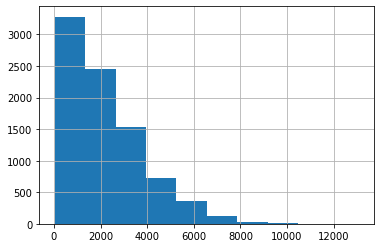

In [23]:
train.Item_Outlet_Sales.hist()

In [24]:
train.isna().sum() , test.isna().sum()

(Item_Identifier            0
 Item_Weight             1463
 Item_Fat_Content           0
 Item_Visibility            0
 Item_Type                  0
 Item_MRP                   0
 Outlet_Identifier          0
 Outlet_Size             2410
 Outlet_Location_Type       0
 Outlet_Type                0
 Item_Outlet_Sales          0
 old                        0
 dtype: int64,
 Item_Identifier            0
 Item_Weight              976
 Item_Fat_Content           0
 Item_Visibility            0
 Item_Type                  0
 Item_MRP                   0
 Outlet_Identifier          0
 Outlet_Size             1606
 Outlet_Location_Type       0
 Outlet_Type                0
 old                        0
 dtype: int64)

In [25]:
Item_Weight_mean = train['Item_Weight'].mean()

In [26]:
train['Item_Weight'] = train['Item_Weight'].fillna(Item_Weight_mean)
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [27]:
train_cat.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [28]:
smp = SimpleImputer(missing_values=np.nan, strategy='most_frequent',verbose=1)
smp_num = SimpleImputer (missing_values=np.nan, strategy= "mean",verbose =1 )

In [29]:
smp

SimpleImputer(strategy='most_frequent', verbose=1)

In [30]:
train_cat = train_cat.astype("category")

In [31]:
train_cat_impute = pd.DataFrame (smp.fit_transform(train_cat),columns= train_cat.columns)

In [32]:
train_cat_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 7 columns):
Item_Identifier         8523 non-null object
Item_Fat_Content        8523 non-null object
Item_Type               8523 non-null object
Outlet_Identifier       8523 non-null object
Outlet_Size             8523 non-null object
Outlet_Location_Type    8523 non-null object
Outlet_Type             8523 non-null object
dtypes: object(7)
memory usage: 466.2+ KB


In [33]:
test_cat_impute = pd.DataFrame(smp.fit_transform(test_cat),columns=test_cat.columns)

In [34]:
test_cat_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 7 columns):
Item_Identifier         5681 non-null object
Item_Fat_Content        5681 non-null object
Item_Type               5681 non-null object
Outlet_Identifier       5681 non-null object
Outlet_Size             5681 non-null object
Outlet_Location_Type    5681 non-null object
Outlet_Type             5681 non-null object
dtypes: object(7)
memory usage: 310.8+ KB


In [35]:
train_num_imput = pd.DataFrame(smp_num.fit_transform(train_num), columns= train_num.columns)

In [36]:
train_num_imput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 5 columns):
Item_Weight          8523 non-null float64
Item_Visibility      8523 non-null float64
Item_MRP             8523 non-null float64
Item_Outlet_Sales    8523 non-null float64
old                  8523 non-null float64
dtypes: float64(5)
memory usage: 333.1 KB


In [37]:
test_num_imput = pd.DataFrame(smp_num.fit_transform(test_num),columns= test_num.columns)

In [38]:
train_num_imput.describe()


,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,old
count,8523.00000,8523.00000,8523.00000,8523.00000,8523.00000
mean,12.85765,0.06613,140.99278,2181.28891,15.16813
std,4.22612,0.05160,62.27507,1706.49962,8.37176
min,4.55500,0.00000,31.29000,33.29000,4.00000
25%,9.31000,0.02699,93.82650,834.24740,9.00000
50%,12.85765,0.05393,143.01280,1794.33100,14.00000
75%,16.00000,0.09459,185.64370,3101.29640,26.00000
max,21.35000,0.32839,266.88840,13086.96480,28.00000


In [39]:
train_num_imput['Item_Visibility'].mean()

0.06613202877895127

In [40]:
train_num_imput['Item_Visibility'].replace(0,train_num_imput['Item_Visibility'].mean(),inplace = True) 
test_num_imput['Item_Visibility'].replace(0,test_num_imput['Item_Visibility'].mean(),inplace= True)

In [41]:
train_cat_impute.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [42]:
#data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
train_cat_impute.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [43]:
train_cat_new =  pd.get_dummies(train_cat_impute,columns=['Item_Fat_Content','Item_Type','Outlet_Location_Type', 
                                                          'Outlet_Size','Outlet_Type'])
test_cat_new = pd.get_dummies(test_cat_impute,columns=['Item_Fat_Content','Item_Type','Outlet_Location_Type', 
                                                          'Outlet_Size','Outlet_Type'])
#test_cat_new = pd.get_dummies(test_cat_impute)

In [44]:
train_cat_new.shape, train_num.shape, test_cat_new.shape, test_num.shape

((8523, 30), (8523, 5), (5681, 30), (5681, 4))

In [45]:
train_new = pd.concat([train_num_imput,train_cat_new],axis=1)
test_new = pd.concat([test_num_imput, test_cat_new],axis =1)

In [46]:
train_new.shape, test_new.shape

((8523, 35), (5681, 34))

In [47]:
#missing_col = train_new.columns.difference(test_new.columns)

In [48]:
#missing_col

In [49]:
# #missing_col1 = set(train_new) - set(test_new)
# missing_col1
# missing_col2 = missing_col1.copy()
# missing_col3 = missing_col1

In [50]:
# missing_col2.remove('Item_Outlet_Sales')
# for c in missing_col2:
#     test_new[c] = 0

In [51]:
#X_test = X_test[X_train.columns]
#test_new1 = test_new[x_test.columns]
train_new_copy = train_new.copy()
test_new_copy = test_new.copy()

In [52]:
train_new.drop(['Item_Identifier'],axis=1,inplace=True)
test_new.drop(['Item_Identifier'],axis=1,inplace=True)
train_new.drop(['Outlet_Identifier'],axis=1,inplace=True)
test_new.drop(['Outlet_Identifier'],axis=1,inplace=True)
train_new.drop(['Item_Weight'],axis=1,inplace=True)
test_new.drop(['Item_Weight'],axis=1,inplace=True)

train_new.shape , test_new.shape

((8523, 32), (5681, 31))

In [53]:
#X_train, X_test,y_train, y_test = sk.model_selection.train_test_split(data.loc[:,data.columns != "target"],data[["target"]], 
 #                                                  test_size = 0.10 ,random_state = 123)

x_train, x_test, y_train, y_test = train_test_split( train_new.loc[:,train_new.columns!= "Item_Outlet_Sales"],
          train_new.loc[:,train_new.columns == "Item_Outlet_Sales"], test_size = .10 , random_state =123)

In [54]:
x_train.shape  , x_test.shape, y_train.shape, y_test.shape

((7670, 31), (853, 31), (7670, 1), (853, 1))

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

array_x = x_train.values
array_y = y_train.values

In [56]:
# kbest = SelectKBest(score_func=chi2, k=4)
# fit = kbest.fit(array_x, array_y)
# # summarize scores
# set_printoptions(precision=3)
# print(fit.scores_)
# features = fit.transform(array_x)
# # summarize selected features
# print(features[0:5,:])

In [57]:
model = LinearRegression()
rfe = RFE(model, 20)
fit = rfe.fit(array_x, array_y)

#set_printoptions(precision=)
print (fit.ranking_)
print (fit.support_)
print(x_train.columns[fit.support_])
x_train.columns

C:\Users\esacsat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[ 1  7  4  5  1  1  1  1  9  1  1  8  1  1  1 11  1  1  1 12  6  2 10  1
  1  3  1  1  1  1  1]
[ True False False False  True  True  True  True False  True  True False
  True  True  True False  True  True  True False False False False  True
  True False  True  True  True  True  True]
Index(['Item_Visibility', 'Item_Fat_Content_Regular', 'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Dairy', 'Item_Type_Frozen Foods', 'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Outlet_Location_Type_Tier 3', 'Outlet_Size_High', 'Outlet_Size_Small', 'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'], dtype='object')


Index(['Item_Visibility', 'Item_MRP', 'old', 'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular', 'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3', 'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small', 'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'], dtype='object')

In [58]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()
# fit = model.fit(array_x, array_y)

# #set_printoptions(precision=)
# print("Num Features: %d") % fit.n_features_
# print("Selected Features: %s") % fit.support_
# print("Feature Ranking: %s") % fit.ranking
# print(x_train.columns[fit.support_])
# print(x_train.columns)

# x_train, x_test, y_train, y_test and test_new1 for models`

In [59]:
modelLR = Ridge() #LinearRegression()

In [60]:
modelLR

Ridge()

In [61]:
lm = modelLR.fit(x_train,y_train)

In [62]:
print('coefficient of determination:',lm.score(x_train,y_train))

coefficient of determination: 0.5631131717033941


In [63]:
print('slope:', lm.coef_)
print('intercept:', lm.intercept_)

slope: [[-1.32264900e+02  1.55855607e+01 -3.43487047e+01 -1.90210367e+01
   1.90210367e+01 -2.24603135e+01 -1.30306097e+01  4.95777172e+01
   1.15024802e+01 -3.03609762e+01 -3.31260970e+01  1.68551351e+01
  -3.36677727e+01 -2.71489301e+01 -3.78681758e+01  5.42955800e+00
  -4.38300269e+01  2.35942315e+02 -3.58316392e+01 -4.20886435e-01
  -4.15617779e+01  1.91906738e+02  6.46249359e+00 -1.98369231e+02
   5.05241701e+02 -2.92345839e+02 -2.12895862e+02 -1.65518862e+03
  -1.29914306e+02 -3.89475334e+02  2.17457826e+03]]
intercept: [840.21481399]


In [64]:
 y_train_pred = lm.predict(x_train)

In [65]:
y_pred = lm.intercept_ + np.sum(lm.coef_ * x_train, axis=1)

In [66]:
y_train_pred[1:5] , y_train[1:5],

(array([[ 837.97932896],
        [2763.23614979],
        [1588.48663775],
        [3000.76009307]]),
       Item_Outlet_Sales
 7681          575.25120
 7385         4234.48800
 7553         1177.13440
 6217         4649.94720)

In [67]:
#y_train.head(), x_train.head()

In [68]:
y_test_pred = lm.predict(x_test)

In [69]:
lm.score(x_train,y_train) , lm.score(x_test,y_test)

(0.5631131717033941, 0.5645685102266854)

In [70]:
test_result = lm.predict(test_new)

In [71]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [72]:
from sklearn.metrics import r2_score
mean_squared_error(y_train, y_train_pred),mean_absolute_error(y_train, y_train_pred) , r2_score(y_train, y_train_pred)

(1279565.1330651357, 838.6418727183082, 0.5631131717033941)

In [73]:
submit =pd.DataFrame()

In [74]:
submit = test[['Item_Identifier', 'Outlet_Identifier']].copy()

In [75]:
submit['Item_Outlet_Sales'] = test_result

In [76]:
submit.head(5)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1754.21917
1,FDW14,OUT017,1562.83041
2,NCN55,OUT010,1870.92775
3,FDQ58,OUT017,2577.72874
4,FDY38,OUT027,5185.89370


In [77]:
submit= submit.set_index('Item_Identifier')

In [78]:
submit.to_csv("c:/aa mtas/AA_ER/ml/python-code/bigmart-sales-data/bigmarket-sales-linear_29_feb_delweight_yearold.csv")

In [79]:
#XGboost Regressor
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor

In [80]:
xgmodel = XGBRegressor(n_estimators=100,  booster="gbtree",silent=0,max_depth=4)

In [81]:
print(xgmodel)

XGBRegressor(max_depth=4, silent=0)


In [82]:
from sklearn.model_selection import cross_val_score, KFold
xg = xgmodel.fit(x_train,y_train)

[22:39:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [83]:
 kfold = KFold(n_splits=10, shuffle=True)
 kf_cv_scores = cross_val_score(xgmodel, x_train, y_train, cv=kfold )
 print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

[22:39:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:39:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:39:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:39:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:39:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:39:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:39:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:39:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:39:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [84]:
#y_train_pred_xg   = xg.predict(x_train)
y_train_pred_xgkfold  = xgmodel.predict(x_train)
y_test_pred_xgkfold  = xgmodel.predict(x_test)
test_result_xgkfold  = xgmodel.predict(test_new)


In [85]:
xg.score(x_train,y_train) , xg.score(x_test,y_test) 

(0.6560475109316883, 0.5827489676340204)

In [86]:
print('coefficient of determination:',xg.score(x_train,y_train))
print (" MSE : ", mean_squared_error(y_train, y_train_pred_xgkfold))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_train, y_train_pred_xgkfold)))
print (" MAE : ", mean_absolute_error(y_train, y_train_pred_xgkfold))

coefficient of determination: 0.6560475109316883
 MSE :  1007376.7024717557
RMSE: 1003.68
 MAE :  710.4944250740961


In [87]:
 submit =pd.DataFrame()
 submit = test[['Item_Identifier', 'Outlet_Identifier']].copy()
 submit['Item_Outlet_Sales'] = test_result_xgkfold
 submit= submit.set_index('Item_Identifier')
 submit.to_csv("c:/aa mtas/AA_ER/ml/python-code/bigmart-sales-data/bigmarket-sales-xgboost.csv")

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


In [89]:
rf = RandomForestRegressor(n_estimators = 400,random_state=123,max_features="sqrt",max_depth=50,min_samples_leaf=5, oob_score = True)

# Train the model on training data
print(rf) 


RandomForestRegressor(max_depth=50, max_features='sqrt', min_samples_leaf=5,
                      n_estimators=400, oob_score=True, random_state=123)


In [90]:
rf.fit(x_train, y_train)
y_train_pred_rf  = rf.predict(x_train)
y_test_pred_rf   = rf.predict(x_test)
test_result_rf   = rf.predict(test_new)
rf.score(x_train,y_train) , rf.score(x_test,y_test) 

C:\Users\esacsat\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


(0.6708007561006579, 0.5989243172194826)

In [91]:
(0.6708007561006579, 0.5989243172194826)

(0.6708007561006579, 0.5989243172194826)

In [92]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score (rf, x_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())


C:\Users\esacsat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\esacsat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\esacsat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\esacsat\AppData\Local\Continuum\anaconda3\l

K-fold CV average score: 0.58


In [93]:
kf_cv_scores

array([0.59229318, 0.57576704, 0.57271643, 0.54162889, 0.56817007,
       0.59298615, 0.53825317, 0.57786588, 0.55222322, 0.65191905])

In [94]:
y_train_pred_rf  = rf.predict(x_train)
y_test_pred_rf   = rf.predict(x_test)
test_result_rf   = rf.predict(test_new)
rf.score(x_train,y_train) , rf.score(x_test,y_test) 

(0.6708007561006579, 0.5989243172194826)

In [95]:
print('coefficient of determination:',rf.score(x_train,y_train))
#print('slope:', xg.coef_())
#print('intercept:', xg.intercept_)
print (" MSE : ", mean_squared_error(y_train, y_train_pred_rf ))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_train, y_train_pred_rf )))
print (" MAE : ", mean_absolute_error(y_train, y_train_pred_rf ))

coefficient of determination: 0.6708007561006579
 MSE :  964167.0268873984
RMSE: 981.92
 MAE :  694.1223523117305


In [96]:
a = np.array(y_train['Item_Outlet_Sales'])
np.mean(np.abs((a - y_train_pred_rf) / a)) * 100


55.64679668377368

In [97]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [98]:
mean_absolute_percentage_error(y_train['Item_Outlet_Sales'],y_train_pred_rf)

55.64679668377368

In [99]:
 submit =pd.DataFrame()
 submit = test[['Item_Identifier', 'Outlet_Identifier']].copy()
 submit['Item_Outlet_Sales'] = test_result_rf
 submit= submit.set_index('Item_Identifier')
 submit.to_csv("c:/aa mtas/AA_ER/ml/python-code/bigmart-sales-data/bigmarket-sales-random.csv")

In [100]:
 def write2csv (test_result, file):
    submit =pd.DataFrame()
    submit = test[['Item_Identifier', 'Outlet_Identifier']].copy()
    submit['Item_Outlet_Sales'] = test_result
    submit= submit.set_index('Item_Identifier')
    filename = "c:/aa mtas/AA_ER/ml/python-code/bigmart-sales-data/" + file 
    print(filename)
    submit.to_csv(filename)

In [101]:
write2csv(test_result_rf,"rf.csv")

c:/aa mtas/AA_ER/ml/python-code/bigmart-sales-data/rf.csv


In [102]:
from sklearn.decomposition import PCA

In [103]:
pca = PCA(n_components=.95)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)
test_new_pca = pca.fit_transform(test_new)
print("pca.explained_variance_ratio_", pca.explained_variance_ratio_ )
x_train_pca.shape, x_train.shape

pca.explained_variance_ratio_ [0.98120265]


((7670, 1), (7670, 31))

In [104]:
pca

PCA(n_components=0.95)

In [105]:
lm = modelLR.fit(x_train_pca,y_train)
print('coefficient of determination:',lm.score(x_train_pca,y_train))
print('slope:', lm.coef_)
print('intercept:', lm.intercept_)
y_train_pred_pca = lm.predict(x_train_pca)
y_test_pred_pca = lm.predict(x_test_pca)
test_pred_pca = lm.predict(test_new_pca)

coefficient of determination: 0.32245910222650565
slope: [[15.61982033]]
intercept: [2185.01115525]


In [106]:
 from sklearn import metrics

In [107]:
print(metrics.mean_absolute_error(y_train, y_train_pred_pca))
print(metrics.r2_score(y_train,y_train_pred_pca)) 
    

1035.222054747786
0.32245910222650565


In [108]:
write2csv(test_pred_pca,"pca_95.csv")

c:/aa mtas/AA_ER/ml/python-code/bigmart-sales-data/pca_95.csv
